# **Conservatory Group**
# **Project Title: Effects of COVID-19 on Retail Sales and E-Commerce in the US**

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

## **Retail Sales Trends**

## **Retail Grocery Vs E-Grocery**

In [132]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\retail_grocery.csv"

In [133]:
retail_grocery = pd.read_csv(file)
retail_grocery.head()

,DATE,RSGCS_20200814,RSGCS_20200916
0,2010-01-01,43028,43028
1,2010-02-01,43735,43735
2,2010-03-01,43304,43304
3,2010-04-01,43186,43186
4,2010-05-01,43266,43266


In [134]:
retail_grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            128 non-null    object
 1   RSGCS_20200814  128 non-null    object
 2   RSGCS_20200916  128 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [135]:
retail_grocery_sept = retail_grocery.drop(['RSGCS_20200814'], axis = 1)
retail_grocery_sept.head()

,DATE,RSGCS_20200916
0,2010-01-01,43028
1,2010-02-01,43735
2,2010-03-01,43304
3,2010-04-01,43186
4,2010-05-01,43266


In [136]:
retail_grocery_sept['RSGCS_20200916'] = retail_grocery_sept['RSGCS_20200916'].astype(int)

retail_grocery_sept['DATE'] = pd.to_datetime(retail_grocery_sept['DATE'])

In [137]:
retail_grocery_sept.rename(columns = {'RSGCS_20200916':'Amount'}, inplace=True)

In [138]:
retail_grocery_sept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    128 non-null    datetime64[ns]
 1   Amount  128 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 1.6 KB


In [139]:
retail_grocery_sept.tail()

,DATE,Amount
123,2020-04-01,63869
124,2020-05-01,64667
125,2020-06-01,63454
126,2020-07-01,63916
127,2020-08-01,62905


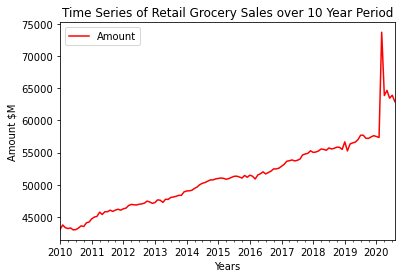

In [167]:
retail_grocery_sept.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Years')
plt.ylabel('Amount $M')
plt.title('Time Series of Retail Grocery Sales over 10 Year Period')
plt.show()

**Retail grocery Y2020**

In [141]:
# select 2020 data
retail_grocery_y20 = retail_grocery_sept.loc[120:]
retail_grocery_y20

,DATE,Amount
120,2020-01-01,57495
121,2020-02-01,57337
122,2020-03-01,73714
123,2020-04-01,63869
124,2020-05-01,64667
125,2020-06-01,63454
126,2020-07-01,63916
127,2020-08-01,62905


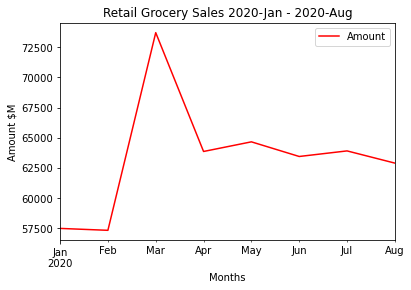

In [166]:
retail_grocery_y20.plot(x='DATE', y='Amount', color='r')
plt.xlabel('Months')
plt.ylabel('Amount $M')
plt.title('Retail Grocery Sales 2020-Jan - 2020-Aug')
plt.show()

**E-Grocery Sales**


**Source:** Brick Meets Clicks (BMC)/Mercatus Grocery Shopping Survey 

In [143]:
# e-grocery March, April, May, June, and August
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug'] 
Amount= [4000, 5300, 6600, 7200, 5700]


e_grocery_2020 = pd.DataFrame({'DATE': labels,
                              'Amount': Amount})
e_grocery_2020

,DATE,Amount
0,Mar,4000
1,Apr,5300
2,May,6600
3,Jun,7200
4,Aug,5700


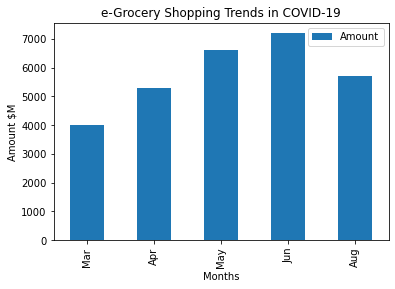

In [144]:
e_grocery_2020.plot(kind='bar', x='DATE', y='Amount')
plt.xlabel('Months')
plt.ylabel('Amount $M')
plt.title('e-Grocery Shopping Trends in COVID-19')
plt.show()

**Retail Grocery Sales vs e-Grocery Sales**

**Note:** Comparison is done between the same corresponding month in each data set due to the limitations of obtaining data for the months of January, February and July.

In [149]:
# Extract retail grocery data corresponding to the months in e-grocery_2020
rem_months = retail_grocery_y20[(retail_grocery_y20['DATE']=='2020-01-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-02-01') |\
                                                                  (retail_grocery_y20['DATE']=='2020-07-01')].index
retail_grocery_covid = retail_grocery_y20.drop(rem_months).reset_index(drop = True)

In [152]:
retail_covid_months = retail_grocery_covid.drop(['DATE'], axis = 1)
retail_covid_months['Months'] = [label for label in labels]
retail_covid_months.rename(columns={'Months':'DATE'}, inplace = True)
retail_covid_months

,Amount,DATE
0,73714,Mar
1,63869,Apr
2,64667,May
3,63454,Jun
4,62905,Aug


In [162]:
merged_grocery = pd.merge(e_grocery_2020, retail_covid_months, on='DATE', suffixes=("_e_Grocery", "_Retail_Grocery"))
merged_grocery

,DATE,Amount_e_Grocery,Amount_Retail_Grocery
0,Mar,4000,73714
1,Apr,5300,63869
2,May,6600,64667
3,Jun,7200,63454
4,Aug,5700,62905


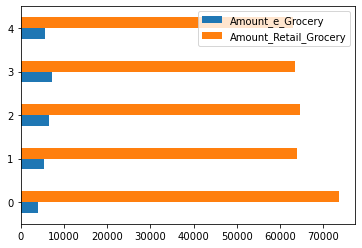

In [169]:
ax = merged_grocery.plot.barh()

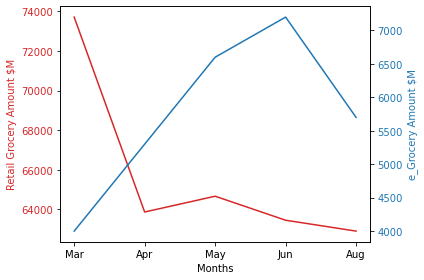

In [183]:
# Create some mock data
t = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
data1 = retail_covid_months['Amount']
data2 = e_grocery_2020['Amount']
labels = ['Mar', 'Apr', 'May', 'Jun', 'Aug']
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Months')
ax1.set_ylabel('Retail Grocery Amount $M', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('e_Grocery Amount $M', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## **E-Commerce**

In [192]:
file = r"C:\Users\lenpk\OneDrive\Desktop\useful_data\e-com-timeseries.txt"
e_com = pd.read_csv(file, sep= "/", header = None)
e_com.columns = ['Quarter', 'Retail Total', 'E_Commerce', 'E_Com_Pct_Total', 'Total_Pct_chnge_prQ', 'E_com_Pct_chnge_prQ', 'Total_Pct_chnge_sameQ', 'E_com_Pct_chnge_sameQ']

In [195]:
e_com.tail(10)

,Quarter,Retail Total,E_Commerce,E_Com_Pct_Total,Total_Pct_chnge_prQ,E_com_Pct_chnge_prQ,Total_Pct_chnge_sameQ,E_com_Pct_chnge_sameQ
73,1st quarter 2002,771036,9904,1.3,-1.8,6.3,2.0,21.7
74,4th quarter 2001,785062,9314,1.2,3.7,11.7,4.4,18.8
75,3rd quarter 2001,757402,8335,1.1,-0.9,-0.0,1.4,12.3
76,2nd quarter 2001,764003,8336,1.1,1.1,2.5,3.2,28.9
77,1st quarter 2001,755686,8135,1.1,0.5,3.8,2.1,42.9
78,4th quarter 2000,752210,7840,1.0,0.8,5.7,4.0,75.2
79,3rd quarter 2000,746589,7419,1.0,0.9,14.8,5.5,NaN
80,2nd quarter 2000,740192,6465,0.9,-0.0,13.6,6.9,NaN
81,1st quarter 2000,740394,5691,0.8,2.3,27.1,9.3,NaN
82,4th quarter 1999,723582,4476,0.6,2.2,NaN,9.0,NaN
